# RetroTide - Extras (2)

Vincent Blay - Mar 2022

In this notebook we show the capabilities of RetroTide to recommend polyketides that meet a desired property specification.

In [1]:
from retrotide import *
import retrotide
retrotide.__version__

'0.1'

In [2]:
from macaw import *
import macaw
print(macaw.__version__)

1.0.1


In [11]:
from rdkit.Chem import Draw
import pickle

### Generation of polyketides at random

In [9]:
random_PK_library_maker(5, random_state=31)

5 unique polyketides generated.


['C=CC[C@@H](C(=O)O)[C@H](O)[C@@H](CCCCc1c[nH]c(Cl)c1Cl)CCC[C@@H](C(=O)[C@@H](C(=O)[C@H](C[C@@H](CCCC)C[C@@H](C)CC)C(C)C)C(C)C)C(C)C',
 'C=CC[C@@H]([C@@H](O)[C@H](C=C(CCCC)C[C@H](CCCC)C[C@H](CCCC)C(=O)C(CCCCc1c[nH]c(Cl)c1Cl)C(=O)O)CC)[C@H](O)[C@H](CC(C)C)C(C)C',
 'CCCCC1=C[C@H](OC)[C@H](O)[C@H](OC)[C@H](O)[C@H](CC)[C@H](O)[C@@H](C)CNC(=O)[C@H](C)NC(=O)C(CCCCc2c[nH]c(Cl)c2Cl)C(=O)C(CCCC)=C[C@@H](C(C)C)C1',
 'CC[C@@H](CC(O)=C[C@@H](CCCCc1c[nH]c(Cl)c1Cl)C[C@@H](CC)CC(=C[C@H](C[C@@H](C(=O)[C@H](CCCCc1c[nH]c(Cl)c1Cl)[C@H](O)C1=CC[C@@H](O)[C@H](O)C1)C(C)C)C(C)C)OC)C(=O)O',
 'CC[C@@H](C[C@H](O)C(=O)[C@@H](CC)C[C@H](C[C@H](CCCCc1c[nH]c(Cl)c1Cl)[C@H](O)c1ccc([N+](=O)[O-])cc1)C(C)C)C(=O)CC(=O)[C@@H](C)[C@H]1OC(=O)[C@@H]1C']

### Polyketide Evolver - RON inverse design example

Let us load a MACAW model for RON prediction:

In [12]:
file = open('./data/RON_model_RVR.pickle', 'rb') 
mcw, regr = pickle.load(file)
file.close()

Let us request the generation of polyketides with the specification predicted RON = 77:

In [13]:
smiles_hits, Y_hits_pred, modules_lib = PKS_library_evolver(mcw, regr, spec=77, n_hits=5, n_rounds=8, random_state=42)

800 unique polyketides generated.

Round 1

len(smiles_lib_old)=80
len(modules_lib_old)=80
max_len set to 8.
800 unique polyketides generated.

Round 2

len(smiles_lib_old)=80
len(modules_lib_old)=80
max_len set to 8.
800 unique polyketides generated.

Round 3

len(smiles_lib_old)=80
len(modules_lib_old)=80
max_len set to 8.
800 unique polyketides generated.

Round 4

len(smiles_lib_old)=80
len(modules_lib_old)=80
max_len set to 8.
800 unique polyketides generated.

Round 5

len(smiles_lib_old)=80
len(modules_lib_old)=80
max_len set to 8.
800 unique polyketides generated.

Round 6

len(smiles_lib_old)=80
len(modules_lib_old)=80
max_len set to 8.
800 unique polyketides generated.

Round 7

len(smiles_lib_old)=80
len(modules_lib_old)=80
max_len set to 8.
800 unique polyketides generated.

Round 8

len(smiles_lib_old)=80
len(modules_lib_old)=80
max_len set to 8.
800 unique polyketides generated.


Let us look at the results:

In [14]:
smiles_hits

['C=CCC(=CC(=C[C@@H](CC=C)C[C@@H](O)CC)CCCCCC)[C@@H](O)[C@@H](CC=C)C[C@H](C)C[C@H](CC)C(=O)O',
 'C=CC[C@@H]1CCC[C@H](CC)C[C@H](CCCCCC)C(=O)O[C@H](C(C)C)[C@@H](C)CCC(=O)[C@@H](CCCC)CCC1',
 'C=CCC(=C[C@H](CCC(C)C)C(C)C)C[C@H](CC=C)[C@@H](O)CC[C@H](CCCC)C[C@@H](C=C(C)[C@@H](O)CC(=O)O)CC',
 'C=CC[C@@H](C[C@H](C)[C@@H](O)[C@@H](OC)[C@H]1OC(=O)[C@@H]1CCCC)[C@H](O)C(=C[C@@H](C)C[C@H](C)C(=O)C(=CC)CCCCCC)CCCCCC',
 'C=CC[C@@H](C[C@H](C)[C@@H](O)[C@@H](CC=C)C(=O)O)[C@H](O)C=C[C@@H](C)CC[C@H](O)C(C)=CCc1ccccc1']

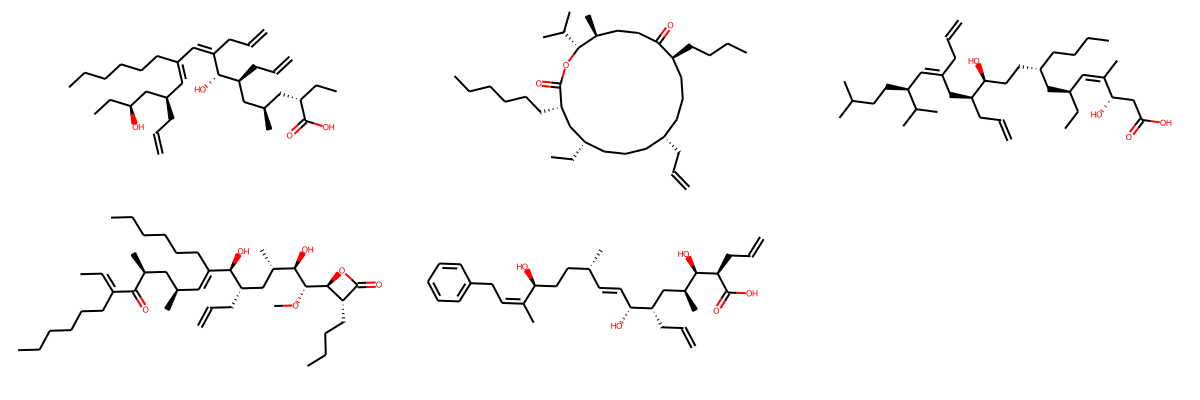

In [16]:
molecules = [Chem.MolFromSmiles(smi) for smi in smiles_hits]

Draw.MolsToGridImage(molecules, subImgSize=(400,200))

In [15]:
Y_hits_pred

array([76.98948114, 77.00608998, 77.01329992, 77.02106296, 77.03770758])

In [17]:
modules_lib

[[["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'],
  ["AT{'substrate': 'hmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'],
  ["AT{'substrate': 'allylmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'],
  ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'],
  ["AT{'substrate': 'allylmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'],
  ["AT{'substrate': 'allylmal'}", "KR{'type': 'B1'}", 'loading: False'],
  ["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'],
  ["AT{'substrate': 'emal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']],
 [["AT{'substrate': 'isobut'}", 'loading: True'],
  ["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'B1'}", 'loading: False'],
  ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False'],
  ["AT{'substrate': 'butmal'}", "KR{'type': 'C1'}", 'loading: False'],
  ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}"